In [1]:
from fastai2.vision.all import *

In [2]:
path = Path('data/tinyset')

In [3]:
Path.BASE_PATH = path

In [4]:
path.ls()

(#3) [Path('.DS_Store'),Path('train'),Path('val')]

In [5]:
files = get_image_files(path)

In [6]:
len(files)

5000

# Datablock

In [42]:
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=GrandparentSplitter(train_name="train", valid_name="val"),
                   item_tfms=Resize(224)
                   )

In [43]:
dblock.summary(path)

Setting-up type transforms pipelines
Found 5000 items
2 datasets of sizes 3750,1250
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      data/tinyset/train/steak/239025.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=384x512
  Pipeline: parent_label -> Categorize
    starting from
      data/tinyset/train/steak/239025.jpg
    applying parent_label gives
      steak
    applying Categorize gives
      TensorCategory(3)

Final sample: (PILImage mode=RGB size=384x512, TensorCategory(3))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImage mode=RGB size=384x512, TensorCategory(3))
    applying Resize gives
      (PILImage mode=RGB size=224x224, TensorCategory(3

In [44]:
dls = dblock.dataloaders(path, num_workers=0)

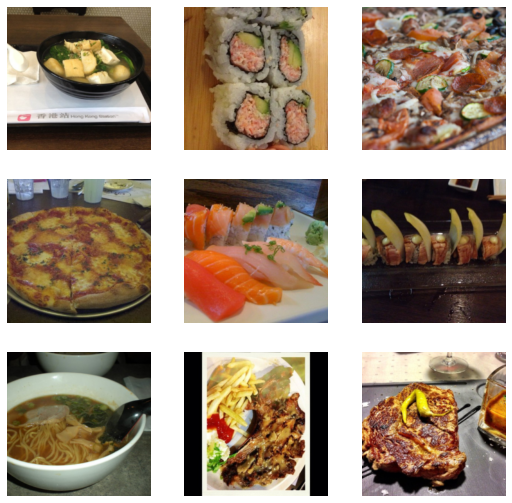

In [45]:
dls.show_batch()

In [46]:
dsets.vocab

(#5) ['bibimbap','pizza','ramen','steak','sushi']

In [47]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.724533,0.255494,0.920800,30:20


epoch,train_loss,valid_loss,accuracy,time
0,0.327530,0.164982,0.955200,37:13
1,0.147133,0.132116,0.968800,38:00
